In [1]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

In [2]:
stream = open(EXAMPLE_FILE)

In [3]:
msg = stream.read()

In [4]:
stream.close()

In [5]:
print(msg)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [6]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [7]:
stream = open(EXAMPLE_FILE,encoding = 'latin-1')
is_body = False
lines = []
for line in stream:
    if is_body:
        lines.append(line)
    elif line =='\n':
        is_body = True
stream.close()
         

In [8]:
email_body = lines
print(lines)

['\n', 'Dear Mr Still\n', '\n', 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n', 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n', 'But WAIT! You\'re probably thinking: "What makes him so special?"\n', 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n', 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n', 'I look forward to hearing from you.\n', '\n', 'Best wishes\n', 'Robin C

In [9]:
email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [10]:
from os import walk
from os.path import join

In [11]:
spam_path_1 = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
spam_cat = 1


In [12]:
def email_body_generator(path):
    for root,dirnames,file_names in walk(path):
        print(root)
        print(file_names[0])

In [13]:
email_body_generator(spam_path_1)

SpamData/01_Processing/spam_assassin_corpus/spam_1
00001.7848dde101aa985090474a91ec93fcf0


In [14]:
def email_body_generator(path):
    for root,dirnames,file_names in walk(path):
        for file_name in file_names:
            filepath = join(root,file_name)
            print(filepath)


In [15]:
#email_body_generator(spam_path_1)

In [16]:
def email_body_generator(path):
    for root,dirnames,file_names in walk(path):
        for file_name in file_names:
            filepath = join(root,file_name)
            stream = open(filepath , encoding = 'latin-1')
            is_body = False
            lines = []
            for line in stream:
                if is_body:
                    lines.append(line)
                elif line =='\n':
                    is_body = True
            stream.close()
            email_body  = '\n'.join(lines)
            yield file_name , email_body
            

    

In [17]:
import pandas as pd

In [18]:
def df_from_directory(path,classification):
    rows = []
    row_names = []
    for file_name , email_body in  email_body_generator(path):
        rows.append({'message': email_body, 'Categeory': classification})
        row_names.append(file_name)
   
        
    return pd.DataFrame(rows,index = row_names)

In [19]:
df_from_directory(spam_path_1,1)

,message,Categeory
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
00497.ebf699da617b11135f3aa9173b9781b9,<html>\n\n<head>\n\n<title>Untitled Document</...,1
00498.48c3098854d339353f1a28a13b196017,This is an HTML email message. If you see thi...,1
00499.988506a852cf86b396771a8bdc8cf839,<html>\n\n<head>\n\n</head>\n\n <body backgro...,1
00500.85b72f09f6778a085dc8b6821965a76f,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",1


In [20]:
spam_path_2 = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
spam_cat = 1


In [21]:
df_from_directory(spam_path_2,1)

,message,Categeory
00001.317e78fa8ee2f54cd4890fdc09ba8176,Greetings!\n\n\n\nYou are receiving this lette...,1
00002.9438920e9a55591b18e60d1ed37d992b,<html>\n\n<body>\n\n<center>\n\n<h3>\n\n<font ...,1
00003.590eff932f8704d8b0fcbe69d023b54d,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00004.bdcc075fa4beb5157b5dd6cd41d8887b,<html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...,1
00005.ed0aba4d386c5e62bc737cf3f0ed9589,"<html><xbody>\n\n<hr width = ""100%"">\n\n<cente...",1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [22]:
spam_emails = df_from_directory(spam_path_1,1)

In [23]:
spam_emails = spam_emails.append(df_from_directory(spam_path_2,1))

In [24]:
spam_emails.shape

(1898, 2)

In [25]:
easy_nonspam_path1 = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
easy_nonspam_path2 = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
ham_cat = 0


In [26]:
ham_emails = df_from_directory(easy_nonspam_path1 ,0)
ham_emails = ham_emails.append(df_from_directory(easy_nonspam_path2 ,0))


In [27]:
ham_emails.shape

(3902, 2)

In [28]:
ham_emails

,message,Categeory
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [29]:
data = pd.concat([spam_emails,ham_emails])

In [30]:
data.head()

,message,Categeory
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [31]:
data[data.message.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds', '.yestee_antony.txt'], dtype='object')

In [32]:
print(data.index.get_loc('.yestee_antony.txt'))

4399


In [33]:
data[4397:4400]

,message,Categeory
02500.05b3496ce7bca306bed0805425ec8621,"\n\nHi,\n\n\n\nI think you need to give us a l...",0
cmds,,0
.yestee_antony.txt,,0


In [34]:
data.shape

(5800, 2)

In [35]:
data.drop(['cmds','.yestee_antony.txt'],inplace = True)

In [36]:
data.shape

(5796, 2)

In [37]:
doucument_ids = range(0,len(data.index))
data['DOC_ID'] = doucument_ids

In [38]:
data

,message,Categeory,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794


In [39]:
data['FILENAME'] = data.index

In [40]:
data

,message,Categeory,DOC_ID,FILENAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5791,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5792,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5793,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5794,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896


In [41]:
data.set_index('DOC_ID',inplace = True)

In [42]:
data

,message,Categeory,FILENAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [43]:
data.shape

(5796, 3)

In [44]:
Data_json_file = 'SpamData/01_Processing/email-text-data.json'

In [45]:
data.to_json(Data_json_file)

In [46]:
data.Categeory.value_counts()

0    3900
1    1896
Name: Categeory, dtype: int64

In [47]:
amount_of_spam = data.Categeory.value_counts()[1]
amount_of_ham = data.Categeory.value_counts()[0]

In [48]:
amount_of_spam

1896

In [49]:
amount_of_ham

3900

In [50]:
import matplotlib.pyplot as plt

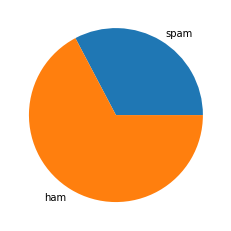

In [51]:
categeory_names = ['spam','ham']
sizes = [amount_of_spam,amount_of_ham]
plt.pie(sizes,labels =categeory_names)
plt.show()

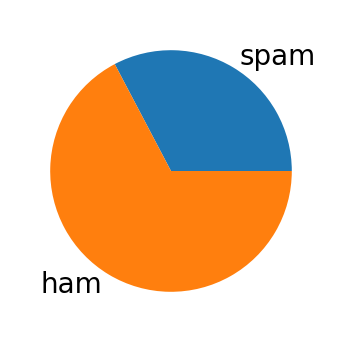

In [52]:
categeory_names = ['spam','ham']
sizes = [amount_of_spam,amount_of_ham]
plt.figure(figsize=(2,2),dpi = 200)
plt.pie(sizes,labels =categeory_names)
plt.show()

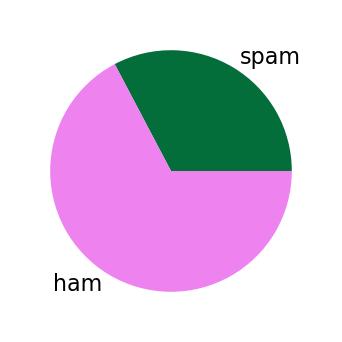

In [53]:
categeory_names = ['spam','ham']
sizes = [amount_of_spam,amount_of_ham]
plt.figure(figsize=(2,2),dpi = 200)
custom_colours = ['#046E3A', 'violet']
plt.pie(sizes,labels =categeory_names,textprops = {'fontsize':8}, colors = custom_colours)
plt.show()

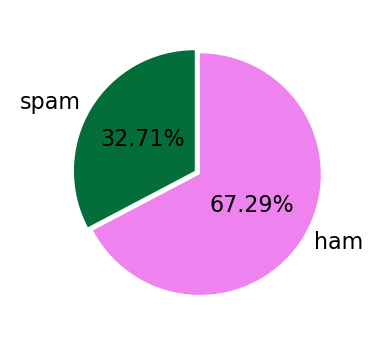

In [54]:
categeory_names = ['spam','ham']
sizes = [amount_of_spam,amount_of_ham]
plt.figure(figsize=(2,2),dpi = 200)
custom_colours = ['#046E3A', 'violet']
plt.pie(sizes,labels =categeory_names,textprops = {'fontsize':8}, colors = custom_colours,autopct = '%1.2f%%',
        pctdistance=0.5,startangle=90,explode = (0,0.05))

plt.show()

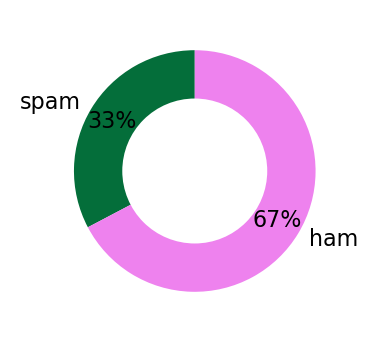

In [55]:
categeory_names = ['spam','ham']
sizes = [amount_of_spam,amount_of_ham]
plt.figure(figsize=(2,2),dpi = 200)
custom_colours = ['#046E3A', 'violet']
plt.pie(sizes,labels =categeory_names,textprops = {'fontsize':8}, colors = custom_colours,autopct = '%1.0f%%',
        pctdistance=0.8,startangle=90)
center_circle = plt.Circle((0,0),radius = 0.6,fc = 'white')
plt.gca().add_artist(center_circle)


plt.show()

# NPL....Natural Processing Language

In [56]:
Msg = 'The quick BROWN fox, is jumPing over a  Lazy dog!!!!'
Msg.lower()

'the quick brown fox, is jumping over a  lazy dog!!!!'

In [57]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shivakumar\pycharmproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: beautifulsoup4 in c:\users\shivakumar\pycharmproject\venv\lib\site-packages (4.9.3)


You should consider upgrading via the 'c:\users\shivakumar\pycharmproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [59]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHIVAKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHIVAKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SHIVAKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [63]:
nltk.download('shakespeare')

[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\SHIVAKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [64]:
# 1. Converting to lower case

In [65]:
Msg = 'The quick BROWN fox, is jumPing over a  Lazy dog!!!!'
Msg.lower()

'the quick brown fox, is jumping over a  lazy dog!!!!'

In [66]:
#2.tokenizing the words

In [67]:
msg = 'All work and no Play makes jack a DULL Boy.'
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']

In [68]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [69]:
len(stopwords.words('english'))

179

In [70]:
stop_words = stopwords.words('english')

In [71]:
type(stop_words)

list

In [72]:
stop_words = set(stopwords.words('english'))

In [73]:
if 'you' in stop_words: print('found it...')

found it...


In [74]:
if 'shiva' not in  stop_words : print(' It out of the box')

 It out of the box


In [75]:
# lower casing, Tokensing, and removing stop words....

In [76]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. THIS THIS THIS this'
words = word_tokenize(msg.lower())
filter_words = []
for word in words:
    
    if word not in stop_words:
        filter_words.append(word)
print(filter_words)
    

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


In [77]:
# stemming...

In [78]:
msg = 'All work and no play makes Jack a dull boy. or not to be. Nobody Playing expects the Spanish Inquisition! Fish Fishes '
words = word_tokenize(msg.lower())
stemmer = PorterStemmer()
filter_words = []
for word in words:
    if word not in stop_words:
        stem_words = stemmer.stem(word)
        filter_words.append(stem_words)
print(filter_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'play', 'expect', 'spanish', 'inquisit', '!', 'fish', 'fish']


In [79]:
# Removing the punctuation marks....

In [80]:
's'.isalpha()

True

In [81]:
'239'.isalpha()

False

In [82]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.??? ;;@@***^^ Nobody expects the Spanish Inquisition!'
words =word_tokenize(msg.lower())
stemmer = PorterStemmer()
filter_words = []
for word in words:
    if word not in stop_words  and word.isalpha():
        stem_words = stemmer.stem(word)
        filter_words.append(stem_words)
print(filter_words)
    

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


In [83]:
# Removing HTML Tags.....

In [84]:
data.head()

,message,Categeory,FILENAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [85]:
data.at[1,'message']

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258\n\n\n\n\n\n-- \n\nIrish Linux Users' Group: ilug@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [86]:
soup = BeautifulSoup(data.at[1,'message'],'html.parser')

In [87]:
soup

1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258





-- 

Irish Linux Users' Group: ilug@linux.ie

http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.

List maintainer: listmaster@linux.ie



In [88]:
def clean_msg(message,stemmer = PorterStemmer(),stop_words = set(stopwords.words('english'))):
    words = word_tokenize(message.lower())
    filter_words = []
    for word in words:
        if word not in stop_words and word.isalpha():
            stem_words = stemmer.stem(word)
            filter_words.append(stem_words)
    return filter_words
    


In [89]:
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [90]:
email_body_tokenized =  clean_msg(email_body)

In [91]:
len(email_body_tokenized)

88

In [92]:
email_body_tokenized[:10]

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma']

In [93]:
def clean_msg_no_html(message,stemmer = PorterStemmer(),stop_words = set(stopwords.words('english'))):
    soup = BeautifulSoup(message,'html.parser')
    cleaned_text = soup.get_text()
    words = word_tokenize(cleaned_text.lower())
    filter_words = []
    for word in words:
        if word not in stop_words and word.isalpha():
            stem_words = stemmer.stem(word)
            filter_words.append(stem_words)
    return filter_words

In [94]:
clean_msg_no_html(data.at[2,'message'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

In [95]:
data

,message,Categeory,FILENAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [96]:
data.loc[4,'FILENAME']

'00005.57696a39d7d84318ce497886896bf90d'

In [97]:
data.iloc[4,2]

'00005.57696a39d7d84318ce497886896bf90d'

In [98]:
data.message

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5791    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5792    > >-- be careful when using this one.) Also, t...
5793    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5794    So then, "Mark Hammond" <mhammond@skippinet.co...
5795    Hi there,\n\n\n\nNow this is probably of no us...
Name: message, Length: 5796, dtype: object

In [99]:
type(data.message)

pandas.core.series.Series

In [100]:
my_first_emails =data.message.iloc[0:3] 

In [101]:
my_first_emails

DOC_ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: message, dtype: object

In [102]:
my_nested_list = my_first_emails.apply(clean_msg)

In [103]:
my_nested_list

DOC_ID
0    [doctyp, html, public, html, html, head, meta,...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
Name: message, dtype: object

In [104]:
my_flat_list = []
for sublist in my_nested_list:
    for item in sublist:
        my_flat_list.append(item)

In [105]:
len(my_flat_list)

321

In [106]:
your_nested_list = [item for sublist in my_nested_list for item in sublist]

In [107]:
len(your_nested_list)

321

In [108]:
nested_list = data.message.apply(clean_msg_no_html)

c:\users\shivakumar\pycharmproject\venv\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [109]:
nested_list.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: message, dtype: object

In [110]:
nested_list.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: message, dtype: object

In [111]:
number_of_processed_words_in_the_messages = []

for sublist in nested_list:
    for item in sublist:
        number_of_processed_words_in_the_messages.append(item)
        
    


In [112]:
len(number_of_processed_words_in_the_messages )

759578

In [113]:
data.Categeory ==0

DOC_ID
0       False
1       False
2       False
3       False
4       False
        ...  
5791     True
5792     True
5793     True
5794     True
5795     True
Name: Categeory, Length: 5796, dtype: bool

In [114]:
data[data.Categeory==0].head()

,message,Categeory,FILENAME
DOC_ID,,,
1896,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0,00001.7c53336b37003a9286aba55d2945844c
1897,"Martin A posted:\n\nTassos Papadopoulos, the G...",0,00002.9c4069e25e1ef370c078db7ee85ff9ac
1898,Man Threatens Explosion In Moscow \n\n\n\nThur...,0,00003.860e3c3cee1b42ead714c5c874fe25f7
1899,Klez: The Virus That Won't Die\n\n \n\nAlready...,0,00004.864220c5b6930b209cc287c361c99af1
1900,"> in adding cream to spaghetti carbonara, whi...",0,00005.bf27cdeaf0b8c4647ecd61b1d09da613


In [115]:
data[data.Categeory==0].shape

(3900, 3)

In [116]:
data[data.Categeory==1].shape

(1896, 3)

In [117]:
doc_id_spam = data[data.Categeory==1].index
doc_id_ham = data[data.Categeory==0].index

In [118]:
nested_list_spam = nested_list.loc[doc_id_spam]

In [119]:
nested_list_ham = nested_list.loc[doc_id_ham]

In [120]:
nested_list_spam.shape[0]

1896

In [121]:
nested_list_ham.shape[0]

3900

In [122]:
nested_list_spam.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: message, dtype: object

In [123]:
nested_list_spam.tail()

DOC_ID
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: message, dtype: object

In [124]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham)
print('number of hammy words:', normal_words.shape[0])

number of hammy words: 442079


In [125]:
flat_list_spam= [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam)
print('number of spammy words:', spammy_words.shape[0])

number of spammy words: 317499


In [126]:
stemmed_nested_list = data.message.apply(clean_msg_no_html)

c:\users\shivakumar\pycharmproject\venv\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [127]:
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

In [128]:
len(flat_stemmed_list)

759578

In [129]:
unique_words = pd.Series(flat_stemmed_list).value_counts()

In [130]:
unique_words.shape[0]

27334

In [131]:
unique_words.head()

http     10660
use       5019
list      4851
email     4367
get       4200
dtype: int64

In [132]:
unique_words.tail()

czarist      1
postiv       1
overdraft    1
chaahat      1
mili         1
dtype: int64

In [133]:
frequent_words = unique_words[:2500]
print('most cmn used words: \n' , frequent_words)

most cmn used words: 
 http         10660
use           5019
list          4851
email         4367
get           4200
             ...  
quarter         44
born            43
secondari       43
forg            43
strateg         43
Length: 2500, dtype: int64


In [134]:
type(frequent_words)

pandas.core.series.Series

In [135]:
frequent_words.iloc[100:1200]

follow     1012
back       1008
form        990
rate        987
month       984
           ... 
front       121
africa      121
graphic     121
tim         121
europ       120
Length: 1100, dtype: int64

In [136]:
print(frequent_words.index)

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'anthoni', 'pci', 'zone', 'advisor', 'boom', 'quarter', 'born',
       'secondari', 'forg', 'strateg'],
      dtype='object', length=2500)


In [137]:
pd.DataFrame({'vocab_word': frequent_words.index.values})

,vocab_word
0,http
1,use
2,list
3,email
4,get
...,...
2495,quarter
2496,born
2497,secondari
2498,forg


In [138]:
vocab = pd.DataFrame({'vocab_word': frequent_words.index.values})

In [139]:
vocab

,vocab_word
0,http
1,use
2,list
3,email
4,get
...,...
2495,quarter
2496,born
2497,secondari
2498,forg


In [140]:
vocab.index.name = 'WORD_ID'

In [141]:
vocab

,vocab_word
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,quarter
2496,born
2497,secondari


In [142]:
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

In [143]:
vocab.to_csv(WORD_ID_FILE,index_label = vocab.index.name, header = vocab.vocab_word.name )

In [144]:
any(vocab.vocab_word=='shiva')

False

In [145]:
any(vocab.vocab_word=='liquid')

False

In [146]:
clean_email_lenghts = []
for sublist in stemmed_nested_list:
    clean_email_lenghts.append(len(sublist))
    

In [147]:
print(clean_email_lenghts[:5])

[92, 56, 44, 206, 45]


In [148]:
len(clean_email_lenghts)

5796

In [149]:
max(clean_email_lenghts)

7671

In [150]:
import numpy as np

In [151]:
np.argmax(clean_email_lenghts)

5775

In [152]:
data.loc[5773:5778]

,message,Categeory,FILENAME
DOC_ID,,,
5773,\n\nForwarded-by: Nev Dull <nev@sleepycat.com>...,0,01378.363deaa0f90db14de13a4a676703826d
5774,use Perl Daily Headline Mailer\n\n\n\nCall for...,0,01379.7b9367f184ed0a8c46b6c8562b86caf8
5775,------------------------ Yahoo! Groups Sponsor...,0,01380.e3fad5af747d3a110008f94a046bf31b
5776,use Perl Daily Newsletter\n\n\n\nIn this issue...,0,01381.044d1085f7fec8bb04229da3d7887424
5777,Hi....\n\n\n\ni installed razor an SpamAssassi...,0,01382.492cd22357b171e9cbbb2ed73f9d551f
5778,\n\n\n\nYea.. this isn't newsworthy...\n\n\n\n...,0,01383.d00e3ef3abf47cc520aa8162bccd3a25


In [153]:
stemmed_nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: message, Length: 5796, dtype: object

In [154]:
stemmed_nested_list_after_tolist = stemmed_nested_list.tolist()

In [155]:
type(stemmed_nested_list_after_tolist)

list

In [156]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list_after_tolist)

In [157]:
word_columns_df

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,http,bizarr,collect,stuf,anim,could,fetch,sold,cornwal,museum,...,None,None,None,None,None,None,None,None,None,None
5792,care,use,one,also,realli,cute,thing,japanes,av,girl,...,None,None,None,None,None,None,None,None,None,None
5793,sm,skip,montanaro,write,jeremi,put,anoth,way,interest,hear,...,None,None,None,None,None,None,None,None,None,None
5794,mark,hammond,like,given,zodb,sound,attract,would,packag,hundr,...,None,None,None,None,None,None,None,None,None,None


In [158]:
word_columns_df.shape

(5796, 7671)

In [159]:
from sklearn.model_selection  import train_test_split

In [160]:
x_train,x_test,y_train,y_test = train_test_split(word_columns_df,data.Categeory,test_size = 0.3,random_state = 42)

In [161]:
x_train.shape[0]

4057

In [162]:
x_test.shape[0]

1739

In [163]:
x_train.index.name = y_train.index.name = 'DOC_ID'
x_test.index.name = y_test.index.name = 'DOC_ID'

In [164]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [165]:
vocab

,vocab_word
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,quarter
2496,born
2497,secondari


In [166]:
vocab.at[0,'vocab_word']

'http'

In [167]:
vocab.at[2000,'vocab_word']

'rohit'

In [168]:
word_index = pd.Index(vocab.vocab_word)

In [169]:
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'anthoni', 'pci', 'zone', 'advisor', 'boom', 'quarter', 'born',
       'secondari', 'forg', 'strateg'],
      dtype='object', name='vocab_word', length=2500)

In [170]:
word_index[2000]

'rohit'

In [171]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [172]:
OCCURENCE = 1

In [173]:
x_train.index[0]

4844

In [174]:
word_index.get_loc('ye') , word_index.get_loc('inde'),word_index.get_loc('agent')

(265, 1236, 502)

In [175]:
my_sample_df = {'DOC_ID': [4844,4844,4844],'LABEL':[0,0,0],'OCCURENECE':[1,1,1],'WORD_ID':[265,1243,505]}
my_sample_df_dict = pd.DataFrame.from_dict(my_sample_df)


In [176]:
my_sample_df_dict



,DOC_ID,LABEL,OCCURENECE,WORD_ID
0,4844,0,1,265
1,4844,0,1,1243
2,4844,0,1,505


In [179]:
def make_sparse_matrix(df,indexed_words,labels):
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    for i in range(nr_rows):
        for j in range (nr_cols):
            word = df.iat[i,j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                dict_list.append(item)
    return pd.DataFrame(dict_list)


In [180]:
sparse_train_df = make_sparse_matrix(x_train,word_index,y_train) 

In [181]:
sparse_train_df.head()

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,4844,1,265
1,0,4844,1,1236
2,0,4844,1,502
3,0,4844,1,308
4,0,4844,1,254


In [182]:
sparse_train_df.shape

(429240, 4)

In [183]:
sample_dict_1 = {'DOC_ID':[4844,4844,4844,4844,4844,4844],'LABEL':[0,0,0,0,0,0],'OCCURENCE':[1,1,1,1,1,1],
                 'WORD_ID':[265,1268,508,265,265,265]}
sample_dict_df_1 = pd.DataFrame.from_dict(sample_dict_1)
sample_dict_df_1

,DOC_ID,LABEL,OCCURENCE,WORD_ID
0,4844,0,1,265
1,4844,0,1,1268
2,4844,0,1,508
3,4844,0,1,265
4,4844,0,1,265
5,4844,0,1,265


In [185]:
sample_dict_df_1_grouped = sample_dict_df_1.groupby(['DOC_ID','LABEL','WORD_ID']).sum()

In [186]:
sample_dict_df_1_grouped

OCCURENCE
DOC_ID LABEL WORD_ID           
4844   0     265              4
             508              1
             1268             1

In [197]:
sample_dict_df_1_grouped()

,DOC_ID,LABEL,WORD_ID,OCCURENCE
0,4844,0,265,4
1,4844,0,508,1
2,4844,0,1268,1


In [206]:
train_grouped = sparse_train_df.groupby(['DOC_ID','LABEL','WORD_ID']).sum()

In [207]:
train_grouped = train_grouped.reset_index()

In [208]:
train_grouped[:10]

,DOC_ID,LABEL,WORD_ID,OCCURENCE
0,0,1,2,1
1,0,1,3,2
2,0,1,4,1
3,0,1,7,3
4,0,1,11,1
5,0,1,16,1
6,0,1,18,2
7,0,1,21,2
8,0,1,23,1
9,0,1,26,2


In [209]:
train_grouped[-10:]

,DOC_ID,LABEL,WORD_ID,OCCURENCE
258354,5795,0,1918,1
258355,5795,0,1944,1
258356,5795,0,1946,1
258357,5795,0,1982,13
258358,5795,0,2022,1
258359,5795,0,2030,1
258360,5795,0,2034,2
258361,5795,0,2267,1
258362,5795,0,2333,1
258363,5795,0,2380,1


In [211]:
vocab.at[1982,'vocab_word']

'nvidia'

In [212]:
data.message[5795]

"Hi there,\n\n\n\nNow this is probably of no use to you whatsoever, but...\n\n\n\nNot a deb-head, but I also have a problem regards NVidia. I've two machines,\n\npretty much the same hardware. \n\nathlon 1700XP's, both have NVidia cards, one Gforce3 Ti and a Gforce2MX,\n\nboth use the same driver module. \n\n\n\nBoth have same kernel version albeit it compiled for their particular\n\nhardware.\n\n\n\nOne works perfectly, the other fails to load. When I check with lsmod, I can\n\nsee the NVdriver is loaded, but not used ;--(\n\nThus when I startx, it bombs out. \n\n\n\nIU still have X with the default nv driver and crappy accelleration -->\n\n650fps with glxgears [should be over 2000fps]\n\nIts not a hardware issue with the cards as I swapped them over and get the\n\nsame symptoms. \n\n\n\nI reckon my mobo is cack, I've tried swapping slots around, reserving\n\nresources etc all to no avail. \n\nShould there be an interrupt for the nv card? I haven't checked the other\n\nbox yet.\n\n\n\

In [213]:
TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'

In [214]:
np.savetxt(TRAINING_DATA_FILE,train_grouped,fmt = '%d')

In [215]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [216]:
y_test.head()

DOC_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: Categeory, dtype: int64

In [217]:
sparse_test_df = make_sparse_matrix(x_test,word_index,y_test) 

In [218]:
sparse_test_df.shape

(203383, 4)

In [219]:
test_grouped = sparse_test_df.groupby(['DOC_ID','LABEL','WORD_ID']).sum().reset_index()

In [220]:
test_grouped.head()

,DOC_ID,LABEL,WORD_ID,OCCURENCE
0,8,1,2,1
1,8,1,3,4
2,8,1,4,2
3,8,1,5,1
4,8,1,6,2


In [221]:
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

In [224]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [225]:
x_test.index

Int64Index([4675, 4220, 2484, 2418, 5110, 1161, 3296,  101, 3337,  401,
            ...
            3674, 4885, 5120, 1338, 2671, 5295, 5740, 5069, 1293, 4354],
           dtype='int64', name='DOC_ID', length=1739)

In [227]:
#set(x_test.index.values)